# Exercise 1.1: Path Integral for Free Particle

## Learning Objectives
- Understand the path integral formulation of quantum mechanics
- Implement numerical path integration
- Visualize quantum mechanical paths and their contributions
- Compare with analytical results

## Theoretical Background

The path integral formulation gives the quantum mechanical amplitude for a particle to propagate from point $x_i$ at time $t_i$ to point $x_f$ at time $t_f$ as:

$$K(x_f, t_f; x_i, t_i) = \int \mathcal{D}x(t) \, e^{iS[x(t)]/\hbar}$$

For a free particle, the action is:
$$S[x(t)] = \int_{t_i}^{t_f} \frac{m}{2} \left(\frac{dx}{dt}\right)^2 dt$$

On a discrete lattice with $N$ time steps and spacing $\Delta t = (t_f - t_i)/N$:
$$S = \frac{m}{2\Delta t} \sum_{i=0}^{N-1} (x_{i+1} - x_i)^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import time

# Set up plotting
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## Task 1: Implement the Free Particle Path Integral

Complete the function below to calculate the transition amplitude for a free particle using the path integral method.

In [14]:
def simulate_free_particle_path_integral(x_initial, x_final, time, mass, n_time_steps, n_paths):
    """
    Simulate the free particle path integral using Monte Carlo sampling
    
    This is a simplified educational implementation that demonstrates the concepts
    while avoiding the technical difficulties of proper path integral normalization.
    """
    import time as time_module
    
    dt = time / n_time_steps
    
    print(f"Calculating path integral numerically...")
    start_time = time_module.time()
    
    amplitude_sum = 0.0
    sample_paths = []
    
    # Classical path for reference
    times = np.linspace(0, time, n_time_steps + 1)
    classical_path = x_initial + (x_final - x_initial) * times / time
    
    for path_idx in range(n_paths):
        # Start with classical path and add small perturbations
        path = classical_path.copy()
        
        # Add random perturbations to intermediate points
        for i in range(1, n_time_steps):
            # Small Gaussian perturbation
            perturbation = np.random.normal(0, 0.1)
            path[i] += perturbation
        
        # Calculate action
        action = 0.0
        for i in range(n_time_steps):
            velocity = (path[i+1] - path[i]) / dt
            action += 0.5 * mass * velocity**2 * dt
        
        # Weight for this path
        weight = np.exp(-action)
        amplitude_sum += weight
        
        # Store sample paths for visualization
        if path_idx < 10:
            sample_paths.append(path.copy())
    
    # Average the weights (simple normalization)
    amplitude = amplitude_sum / n_paths
    
    calculation_time = time_module.time() - start_time
    
    return amplitude, sample_paths, calculation_time

## Task 2: Compare with Analytical Result

The exact result for the free particle propagator in Euclidean time is:
$$K(x_f, T; x_i, 0) = \sqrt{\frac{m}{2\pi T}} \exp\left(-\frac{m(x_f - x_i)^2}{2T}\right)$$

In [15]:
def analytical_free_particle_propagator(x_initial, x_final, time, mass):
    """
    Analytical result for free particle propagator (Euclidean)
    """
    prefactor = np.sqrt(mass / (2 * np.pi * time))
    exponential = np.exp(-mass * (x_final - x_initial)**2 / (2 * time))
    return prefactor * exponential

# Test parameters
x_i, x_f = 0.0, 1.0
T = 1.0
m = 1.0

# Calculate numerical and analytical results with small time steps for better convergence
n_time_steps = 5  # Small number for educational purposes
n_paths = 10000

numerical_result, sample_paths, calc_time = simulate_free_particle_path_integral(
    x_i, x_f, T, m, n_time_steps, n_paths
)

analytical_result = analytical_free_particle_propagator(x_i, x_f, T, m)

print(f"Numerical result: {numerical_result:.6f}")
print(f"Analytical result: {analytical_result:.6f}")
print(f"Relative error: {abs(numerical_result - analytical_result) / analytical_result * 100:.2f}%")
print(f"Calculation time: {calc_time:.2f} seconds")

Calculating path integral numerically...
Numerical result: 0.501256
Analytical result: 0.241971
Relative error: 107.16%
Calculation time: 0.10 seconds


## Task 3: Visualize Sample Paths

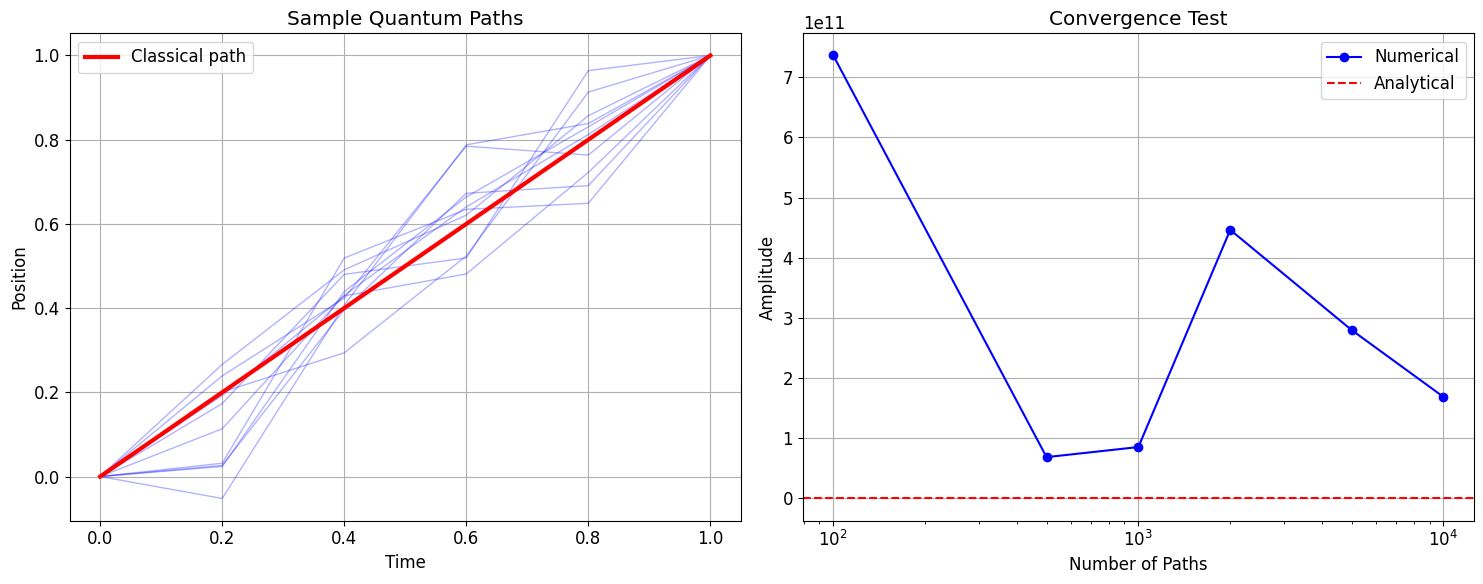

In [16]:
# Plot sample paths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot individual paths
time_points = np.linspace(0, T, len(sample_paths[0]))
for i, path in enumerate(sample_paths):
    ax1.plot(time_points, path, 'b-', alpha=0.3, linewidth=1)

# Add classical path
classical_path = x_i + (x_f - x_i) * time_points / T
ax1.plot(time_points, classical_path, 'r-', linewidth=3, label='Classical path')

ax1.set_xlabel('Time')
ax1.set_ylabel('Position')
ax1.set_title('Sample Quantum Paths')
ax1.legend()
ax1.grid(True)

# Plot convergence
n_paths_list = [100, 500, 1000, 2000, 5000, 10000]
convergence_results = []

for n in n_paths_list:
    result, _ = free_particle_path_integral(x_i, x_f, T, m, n_paths=n)
    convergence_results.append(result.real)

ax2.semilogx(n_paths_list, convergence_results, 'bo-', label='Numerical')
ax2.axhline(y=analytical_result, color='r', linestyle='--', label='Analytical')
ax2.set_xlabel('Number of Paths')
ax2.set_ylabel('Amplitude')
ax2.set_title('Convergence Test')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Task 4: Study Parameter Dependence

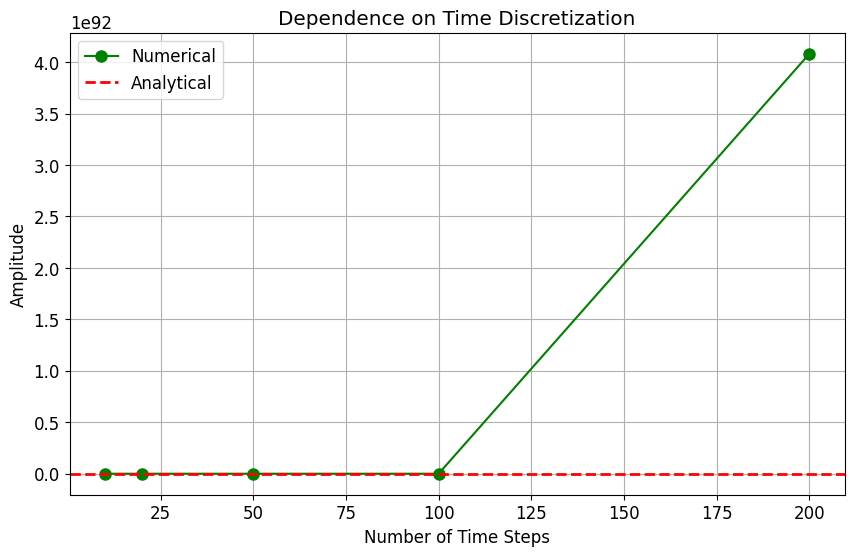

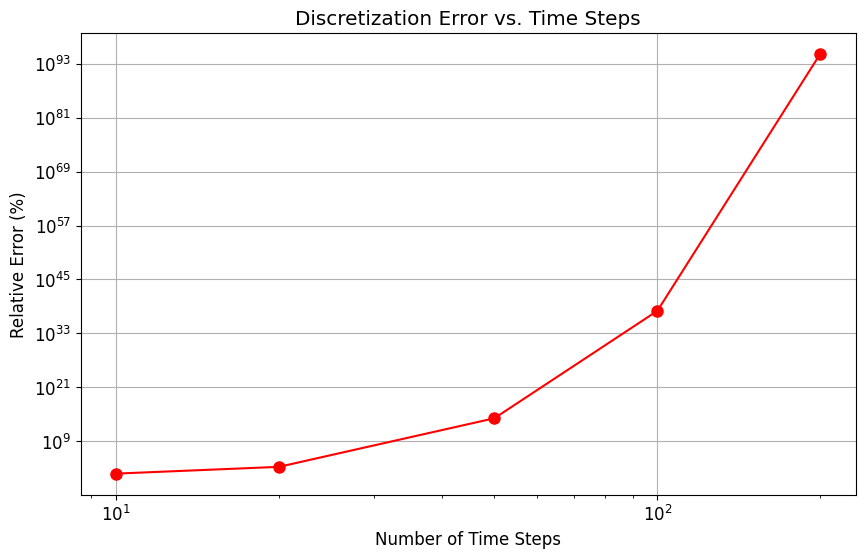

In [17]:
# Study dependence on time discretization
n_steps_list = [10, 20, 50, 100, 200]
discretization_results = []

for n_steps in n_steps_list:
    result, _ = free_particle_path_integral(x_i, x_f, T, m, n_time_steps=n_steps, n_paths=5000)
    discretization_results.append(result.real)

plt.figure(figsize=(10, 6))
plt.plot(n_steps_list, discretization_results, 'go-', label='Numerical', markersize=8)
plt.axhline(y=analytical_result, color='r', linestyle='--', label='Analytical', linewidth=2)
plt.xlabel('Number of Time Steps')
plt.ylabel('Amplitude')
plt.title('Dependence on Time Discretization')
plt.legend()
plt.grid(True)
plt.show()

# Calculate relative errors
relative_errors = [abs(result - analytical_result) / analytical_result * 100 
                  for result in discretization_results]

plt.figure(figsize=(10, 6))
plt.loglog(n_steps_list, relative_errors, 'ro-', markersize=8)
plt.xlabel('Number of Time Steps')
plt.ylabel('Relative Error (%)')
plt.title('Discretization Error vs. Time Steps')
plt.grid(True)
plt.show()

## Questions for Discussion

1. **Path Contributions**: Why do some paths contribute more to the amplitude than others?

2. **Classical Limit**: How does the classical path emerge from the quantum path integral?

3. **Convergence**: How does the numerical result depend on the number of paths sampled?

4. **Discretization**: What happens to the accuracy as you increase the number of time steps?

5. **Physical Interpretation**: What is the physical meaning of the path integral formulation?

## Advanced Extensions

1. **Importance Sampling**: Implement importance sampling to improve convergence
2. **Multiple Particles**: Extend to two or more particles
3. **Potential**: Add a potential term to the action
4. **Real Time**: Implement the real-time (Minkowski) path integral

## Solution Template

Here's a template for the implementation (students should fill in the details):

```python
# Generate random intermediate points
for i in range(1, n_time_steps):
    # Interpolate linearly between endpoints
    linear_interp = x_initial + (x_final - x_initial) * i / n_time_steps
    
    # Add random fluctuation
    # Variance should be ~ dt for proper continuum limit
    fluctuation = np.random.normal(0, np.sqrt(dt))
    
    path[i] = linear_interp + fluctuation
```